Temps d'exécution de la totalité = légèrement inférieur à 4 minutes

# Préparation environnement de travail, importations des csv et fusion des bases

In [ ]:
# monter le google drive pour qu'il soit accessible ("Fichiers" dans colab - liste à gauche)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importation des modules nécessaires

import pandas as pd
import numpy as np

# Option à modifier pour visualiser la totalité des colonnes

pd.set_option('display.max_columns', None)

In [ ]:
# Lecture des fichiers csv

################### Bases complétées
# encoding = 'utf-8 car choix par défaut suite conversion xlsx vers csv en utilisant LibreOffice Calc

inc = pd.read_csv('/content/drive/MyDrive/Projet Pompier/Données complémentaires/LFB Incident data Last 3 years + gps.csv',
                  sep=";",  encoding= 'utf-8')

mob = pd.read_csv('/content/drive/MyDrive/Projet Pompier/Données complémentaires/LFB Mobilisation data Last 3 years + pump.csv',
                  sep=";",  encoding= 'utf-8')

################### Bases initiales
#
#inc = pd.read_csv('/content/drive/MyDrive/Projet Pompier/Données complémentaires/LFB Incident data Last 3 years + gps.csv',
#                       sep=";",  encoding= 'unicode_escape')
#
#mob = pd.read_csv('/content/drive/MyDrive/Projet Pompier/Données brut/LFB Mobilisation data Last 3 years.csv',
#                           sep=";",  encoding= 'unicode_escape')

In [ ]:
# Regroupement des 2 fichiers

lfb = mob.merge(right = inc, on = 'IncidentNumber', how = 'left')

# Suppressions de colonnes inutiles

In [ ]:
# Suppression des colonnes jugées inutiles parmi les 59+2 colonnes de la table fusionnée

# Création d'une liste contenant toutes les colonnes
# Décommenter les colonnes à supprimer + justifier à droite 
remove_col = [
              #'IncidentNumber',                         #
              #'CalYear_x',                              #
              #'HourOfCall_x',                           #
              'ResourceMobilisationId',                 # identifiant unique de mobilisation = inutile
              #'Resource_Code',                          #
              'PerformanceReporting',                   # lié à PumpOrder, redondance de l'info
              #'DateAndTimeMobilised',                   #
              #'DateAndTimeMobile',                      #
              #'DateAndTimeArrived',                     #
              #'TurnoutTimeSeconds',                     #
              #'TravelTimeSeconds',                      #
              #'AttendanceTimeSeconds',                  #
              #'DateAndTimeLeft',                        #
              'DateAndTimeReturned',                    # que des NaN (non utilisé)
              #'DeployedFromStation_Code',               #
              #'DeployedFromStation_Name',               #
              #'DeployedFromLocation',                   #
              #'PumpOrder',                              # ordre des véhicules envoyés (1 à n)
              'PlusCode_Code',                          # que 'initial' = inutile
              'PlusCode_Description',                   # que 'initial mobilisation' = inutile
              'DelayCodeId',                            # information à posteriori qu'on ne pourra utiliser pour des prédictions
              #'DelayCode_Description',                  # information à posteriori, mais à conserver pour l'instant
              #'DateOfCall',                             #
              #'CalYear_y',                              #
              #'TimeOfCall',                             #
              #'HourOfCall_y',                           #
              #'IncidentGroup',                          #
              #'StopCodeDescription',                    #
              #'SpecialServiceType',                     #
              #'PropertyCategory',                       #
              #'PropertyType',                           #
              #'AddressQualifier',                       #
              'Postcode_full',                          # données postales / géo = inutile
              'Postcode_district',                      # données postales / géo = inutile
              'UPRN',                                   # données postales / géo = inutile
              'USRN',                                   # données postales / géo = inutile
              'IncGeo_BoroughCode',                     # données postales / géo = inutile
              'IncGeo_BoroughName',                     # données postales / géo = inutile
              'ProperCase',                             # données postales / géo = inutile
              'IncGeo_WardCode',                        # données postales / géo = inutile
              'IncGeo_WardName',                        # données postales / géo = inutile
              'IncGeo_WardNameNew',                     # données postales / géo = inutile
              'Easting_m',                              # incomplètes
              'Northing_m',                             # incomplètes
              'Easting_rounded',                        # supprimé suite modification base avec colonnes long/lat exploitables
              'Northing_rounded',                       # supprimé suite modification base avec colonnes long/lat exploitables
              'Latitude',                               # incomplètes
              'Longitude',                              # incomplètes
              'FRS',                                    # uniquement London = inutile
              #'IncidentStationGround',                  #
              'FirstPumpArriving_AttendanceTime',       # info partielle, on a un détail plus fin/complet dans autres colonnes 
              'FirstPumpArriving_DeployedFromStation',  # info partielle, on a un détail plus fin/complet dans autres colonnes
              'SecondPumpArriving_AttendanceTime',      # info partielle, on a un détail plus fin/complet dans autres colonnes
              'SecondPumpArriving_DeployedFromStation', # info partielle, on a un détail plus fin/complet dans autres colonnes
              #'NumStationsWithPumpsAttending',          #
              #'NumPumpsAttending',                      #
              #'PumpCount',                              # total nb véhicules sur l'incident => des incohérences à corriger
              'PumpHoursRoundUp',                       # on se connaît pas la méthode / provenance de l'info
              'Notional Cost (£)',                      # coût théorique basé sur "PumpHoursRoundUp" qu'on ne maîtrise pas
              #'Lat',                                    # nouvelle colonne Latitude (base enrichie)
              #'Lon',                                    # nouvelle colonne Longitude (base enrichie)
              ]

# supprimer les colonnes du dataframe, stocker le nouveau dataframe dans df
# (on gardera 'lfb' comme base brute fusionnée, avant nettoyages)

df = lfb.drop(remove_col, axis = 1)


# Contrôle des doublons

In [ ]:
# contrôle des doublons

df.duplicated().sum()

# => aucun doublon à traiter

0

# Travaux sur les NaN

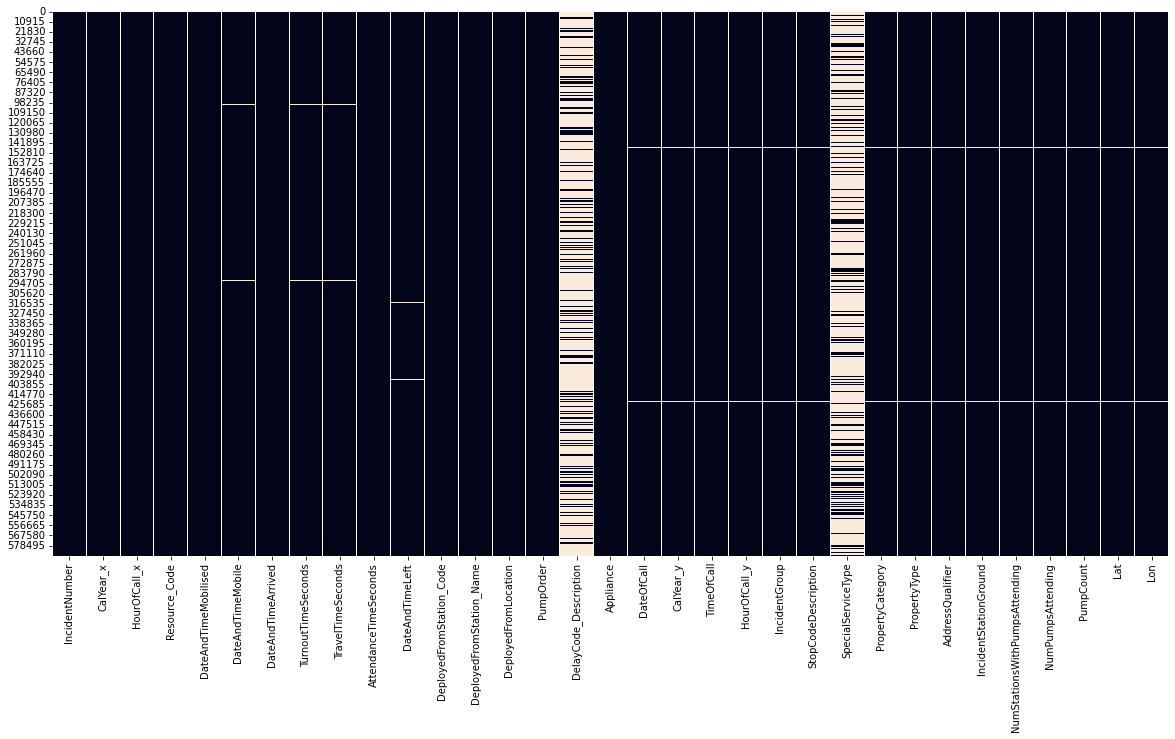

In [ ]:
# Visualisation des NaNs
#Importation des packages
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False)

In [ ]:
# Contrôle des Nan

df.isna().sum()

IncidentNumber                        0
CalYear_x                             0
HourOfCall_x                          0
Resource_Code                         0
DateAndTimeMobilised                  0
DateAndTimeMobile                  3825
DateAndTimeArrived                    0
TurnoutTimeSeconds                 3831
TravelTimeSeconds                  3905
AttendanceTimeSeconds                 0
DateAndTimeLeft                     260
DeployedFromStation_Code             16
DeployedFromStation_Name             16
DeployedFromLocation                337
PumpOrder                             0
DelayCode_Description            457047
Appliance                             0
DateOfCall                         2317
CalYear_y                          2317
TimeOfCall                         2317
HourOfCall_y                       2317
IncidentGroup                      2317
StopCodeDescription                2317
SpecialServiceType               463973
PropertyCategory                   2317


## NaN sur DateOfCall

In [ ]:
# Traitement des NaN sur les 2317 NaN en DateOfCall

(df[df['DateOfCall'].isna()]).isna().sum()

# on constate que ces 2317 se retrouvent sur de nombreuses colonnes => identifier les incidents en question
# = méthode préférable à simplement supprimer les lignes : on est ainsi sûr de supprimer les données complètes d'un incident,
# et ainsi on ne risque pas de conserver des infos partielles (suite incomplète de véhicules) sur un incident


IncidentNumber                      0
CalYear_x                           0
HourOfCall_x                        0
Resource_Code                       0
DateAndTimeMobilised                0
DateAndTimeMobile                  22
DateAndTimeArrived                  0
TurnoutTimeSeconds                 22
TravelTimeSeconds                  22
AttendanceTimeSeconds               0
DateAndTimeLeft                     3
DeployedFromStation_Code            3
DeployedFromStation_Name            3
DeployedFromLocation                1
PumpOrder                           0
DelayCode_Description             528
Appliance                           0
DateOfCall                       2317
CalYear_y                        2317
TimeOfCall                       2317
HourOfCall_y                     2317
IncidentGroup                    2317
StopCodeDescription              2317
SpecialServiceType               2317
PropertyCategory                 2317
PropertyType                     2317
AddressQuali

In [ ]:
# Liste des IncidentNumber pour lesquels DateOfCall = NaN
inc_nan_list = list(df[df['DateOfCall'].isna()]['IncidentNumber'].unique())

print(len(inc_nan_list), "incidents avec des NaN dans 'DateOfCall'")
print(df.shape[0], "lignes avant suppression incidents avec NaN")

# Suppression de ces incidents
df = df.drop(axis=0, index=df[df['IncidentNumber'].isin(inc_nan_list)].index)

print(df.shape[0], "lignes après suppression des incidents avec NaN")


1963 incidents avec des NaN dans 'DateOfCall'
589390 lignes avant suppression incidents avec NaN
587073 lignes après suppression des incidents avec NaN


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]


DateAndTimeMobile             3803
TurnoutTimeSeconds            3809
TravelTimeSeconds             3883
DateAndTimeLeft                257
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456519
SpecialServiceType          461656
dtype: int64

## NaN sur DateAndTimeMobile / TurnoutTimeSeconds / TravelTimeSeconds + DateAndTimeMobilised

DateAndTimeMobile / TurnoutTimeSeconds / TravelTimeSeconds :

Comme aucune valeur manquante dans AttendanceTimeSeconds, on peut :


*   calculer un TurnoutTimeSeconds théorique ;
*   en déduire un TravelTimeSeconds (= AttendanceTime - TurnoutTime) ;
*   recalculer DateAndTimeMobile (= DateAndTimeMobilised + TurnoutTime)

Pour déterminer TurnoutTimeSeconds théorique :
*    calcul Turnout moyen (tout véhicule/incident confondu) ;
*    calcul AttendanceTime moyen (idem) ;
*    calcul de proportion moyenne de Turnout dans AttendanceTime
*    on applique cette proportion à AttendanceTime pour les Turnout NaN

J'avais essayé de le faire en faisant les calculs de moyenne spécifique par ResourceCode, mais temps exécution beaucoup trop long (6 minutes) ; donc abandonné

Aucune spécificité 'SpecialServiceType' pour ces NaN.

In [ ]:
# Contrôle qu'aucun DateAndTimeMpbile ne peut être renseigné au préalable : 
print(df[df['DateAndTimeMobile'].isna()]['TurnoutTimeSeconds'].unique(), "= Valeurs de TurnoutTimeSecondes pour DateAndTimeMobile NaN")
# Nan -> tous les NaN de DateAndTimeMobile ont NaN en TurnoutTimeSeconds

print(df[df['DateAndTimeMobile'].isna()]['TravelTimeSeconds'].unique(), "= Valeurs de TravelTimeSeconds pour DateAndTimeMobile NaN")
# tous les NaN de DateAndTimeMobile ont NaN en TravelTimeSeconds


[nan] = Valeurs de TurnoutTimeSecondes pour DateAndTimeMobile NaN
[nan] = Valeurs de TravelTimeSeconds pour DateAndTimeMobile NaN


In [ ]:
## Travail sur les TurnoutTimeSeconds manquant

# Proportion globale TurnoutTimeSeconds dans AttendanceTimeSeconds (pour les véhicules sans NaN)
# calcul du TurnoutTimeSeconds moyen pour les véhicules sans NaN
turnout_avg = df[df.notna()]['TurnoutTimeSeconds'].mean()
# Calcul du AttendanceTimeSeconds moyen pour les véhicules sans NaN
attendance_avg = df[df.notna()]['AttendanceTimeSeconds'].mean()
# Calcul de proportion TurnoutTime vs AttendaceTime pour les véhicules sans NaN
turnout_prop = turnout_avg/attendance_avg
    

# Calcul des index des TurnoutTimeSeconds NaN
index_turnout_nan = list(df[df['TurnoutTimeSeconds'].isna()].index)

# Boucle pour corriger les TurnoutTimeSeconds manquant
for i in index_turnout_nan:
    df['TurnoutTimeSeconds'].loc[i] = np.round(df['AttendanceTimeSeconds'].loc[i] * turnout_prop , 0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## Prépa travail sur TravelTimesSeconds : est-ce qu'on a tous les AttendanceTimeSeconds nécessaires pour le calcul ?

df[(df['TravelTimeSeconds'].isna()) & (df['AttendanceTimeSeconds'].isna())]

# => pas de données = ok, tous les TravelTimeSeconds NaN ont des valeurs en AttendanceTimeSeconds
# qui nous permettrons de faire les calculs

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon


In [ ]:
## Calcul des TravelTimesSeconds manquant

# Calcul des index des TravelTimeSeconds NaN
index_travel_nan = list(df[df['TravelTimeSeconds'].isna()].index)

# Boucle pour calculer les TravelTimeSeconds (Attendance - Turnout)
for i in index_travel_nan:
    df['TravelTimeSeconds'][i] = df['AttendanceTimeSeconds'][i] - df['TurnoutTimeSeconds'][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

DateAndTimeMobile             3803
DateAndTimeLeft                257
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456519
SpecialServiceType          461656
dtype: int64

In [ ]:
## Calcul des DateAndTimeMobile manquant

# Calcul des index des DateAndTimeMobile NaN
index_mobile_nan = list(df[df['DateAndTimeMobile'].isna()].index)

# Conversion colonne DateAndTimeMobile / DateAndTimeMobilised au format datetime
df['DateAndTimeMobile'] = pd.to_datetime(df['DateAndTimeMobile'], format="%d/%m/%Y %H:%M:%S")
df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised'], format="%d/%m/%Y %H:%M:%S")

# Boucle pour calcul des DateAndTimeMobile manquant (= DateAndTimeMobilised + TurnoutTime)
for i in index_mobile_nan:
    df['DateAndTimeMobile'][i] = pd.to_datetime(df['DateAndTimeMobilised'][i]) + pd.to_timedelta(df['TurnoutTimeSeconds'][i], unit = 's')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft                257
DeployedFromStation_Code        13
DeployedFromStation_Name        13
DeployedFromLocation           336
DelayCode_Description       456519
SpecialServiceType          461656
dtype: int64

## NaN sur DeployedFromStation

13 lignes seulement sont concernées.

L'idée est de :


*   considérer qu'ils sont partis de leur caserne de base = se baser sur 3 premiers caractères de 'Resource_Code' ;
*   et corriger 'DeployedFromLocation' en conséquence (Home Station)
*   que faire de DeployedFromStation_Name ? La compléter ou simplement supprimer ?


In [ ]:
# Création d'une table des stations
station_list = df.groupby(by = ['DeployedFromStation_Code', 'DeployedFromStation_Name']).count().reset_index()[['DeployedFromStation_Code', 'DeployedFromStation_Name']]
station_list = station_list.rename({'DeployedFromStation_Code' : 'Station_code', 'DeployedFromStation_Name' : 'Station_name'}, axis = 1)
print(station_list['Station_code'].duplicated().sum(), 'doublons dans les codes stations')     # Doit être 0 sinon codes en doubles !


0 doublons dans les codes stations


In [ ]:
## Travail sur les DeployedFromStation_Code et Name + Location manquants

# Calcul des index des DeployedFromStation_Code NaN
index_station_nan = list(df[df['DeployedFromStation_Code'].isna()].index)

# Création d'une table des stations
station_list = df.groupby(by = ['DeployedFromStation_Code', 'DeployedFromStation_Name']).count().reset_index()[['DeployedFromStation_Code', 'DeployedFromStation_Name']]
station_list = station_list.rename({'DeployedFromStation_Code' : 'Station_code', 'DeployedFromStation_Name' : 'Station_name'}, axis = 1)
print(station_list.duplicated().sum(), 'doublons dans la table des stations')

# Boucle pour calculer les nouvelles valeurs de DeployedFromStation_Code et Name
for i in index_station_nan:
    station_depl_code = df['Resource_Code'][i][0:3]          # calcul du code station
    df['DeployedFromStation_Code'][i] = station_depl_code    # code station renseigné
    df['DeployedFromLocation'][i] = 'Home Station'           # Home Station pour être cohérent
    # retrouver Nom de la caserne
    #station_depl_name = station_list['Station_name'][station_list[station_list['Station_code'] == station_depl_code].index]
    station_depl_name = list(station_list[station_list['Station_code'] == station_depl_code]['Station_name'])[0]
    # renseigner nom de caserne dans colonne DeployedFromStation_Name
    df['DeployedFromStation_Name'][i] = station_depl_name  #


0 doublons dans la table des stations


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]


DateAndTimeLeft             257
DeployedFromLocation        324
DelayCode_Description    456519
SpecialServiceType       461656
dtype: int64

## NaN sur DeployedFromLocation

On a les éléments pour le calculer :

*   Resource_Code = code caserne (3 premiers caract) + 1 chiffre
*   DeployedFromStation_Code = code caserne de déploiement

Si code caserne dans Resource_Code = DeployedFromStation_Code, ALORS "Home Station", SINON "Other Station"

In [ ]:
# Traitement des NaN sur DeployedFromLocation

# index des DeployedFromLocation NaN
index_deployed_nan = list(df[df['DeployedFromLocation'].isna()].index)

# boucle pour valeurs des DeployedFromLocation
for i in index_deployed_nan:
    if df['DeployedFromStation_Code'][i] == df['Resource_Code'][i][0:3]:
        df['DeployedFromLocation'][i] = "Home Station"
    else:
        df['DeployedFromLocation'][i] = "Other Station"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft             257
DelayCode_Description    456519
SpecialServiceType       461656
dtype: int64

## NaN sur SpecialServiceType

In [ ]:
# NaN qui concernent effectivement des "Special Service"

display(df[(df['IncidentGroup'] == 'Special Service') & (df['SpecialServiceType'].isna())])
# seulement 4 NaN sur des Special Service ; ce sont les seuls lignes avec
# StopCodeDescription = "Use of Special Operations Room"
# donc création d'un SpecialServiceType = Other pour ces 4 cas

# identifier les index concernés
index_serv_type_nan = list(df[df['StopCodeDescription'] == "Use of Special Operations Room"].index)

# boucle pour corriger ces NaN
for i in index_serv_type_nan:
    df['SpecialServiceType'][i] = "Use of Special Operations Room"

# => MODE ?

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Lat,Lon
562309,118671-05092021,2021,20,E381,2021-09-05 19:47:10,2021-09-05 19:49:14,05/09/2021 19:51:54,124.0,160.0,284,05/09/2021 20:14:47,E38,New Cross,Home Station,1,NaN,Pump Dual Ladder,05 Sep 2021,2021.0,20:47:10,20.0,Special Service,Use of Special Operations Room,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,New Cross,1.0,1.0,1.0,"51,4806479165639","-0,047939326093545"
578613,136181-09102021,2021,16,H391,2021-10-09 15:35:03,2021-10-09 15:37:02,09/10/2021 15:40:09,119.0,187.0,306,09/10/2021 16:24:31,H39,Surbiton,Home Station,1,NaN,Pump Dual Ladder,09 Oct 2021,2021.0,16:28:55,16.0,Special Service,Use of Special Operations Room,NaN,Non Residential,Single shop,Correct incident location,Kingston,2.0,2.0,2.0,"51,4108723077695","-0,302558235929007"
578614,136181-09102021,2021,16,H412,2021-10-09 15:35:03,2021-10-09 15:37:32,09/10/2021 15:41:27,149.0,235.0,384,09/10/2021 16:24:59,H41,Kingston,Home Station,2,NaN,Pump Ladder,09 Oct 2021,2021.0,16:28:55,16.0,Special Service,Use of Special Operations Room,NaN,Non Residential,Single shop,Correct incident location,Kingston,2.0,2.0,2.0,"51,4108723077695","-0,302558235929007"
579155,136720-10102021,2021,17,F261,2021-10-10 16:06:57,2021-10-10 16:08:51,10/10/2021 16:10:00,114.0,69.0,183,10/10/2021 16:44:28,F26,Bethnal Green,Home Station,1,NaN,Pump Dual Ladder,10 Oct 2021,2021.0,17:06:57,17.0,Special Service,Use of Special Operations Room,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,Bethnal Green,1.0,1.0,1.0,"51,5274721703443","-0,051703859938406"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
# Tous les autres NaN sont "normaux" parce qu'ils ne concernent pas des "Special Service"

# Remplacer ces NaN par valeur "Not Special Service"
df['SpecialServiceType'] = df['SpecialServiceType'].fillna("Not Special Service")


In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

DateAndTimeLeft             257
DelayCode_Description    456519
dtype: int64

## NaN sur DelayCode_Description

Si NaN dans cette colonne, alors cela signifie pas de retard vs les objectifs fixés dans le London Safety Plan en vigueur.
Donc remplacer ces NaN par "No delay"

In [ ]:
# Remplacer les NaN de DelayCode_Description par "No delay"
df['DelayCode_Description'] = df['DelayCode_Description'].fillna("No delay")

In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

# Les NaN sur DateAndTimeLeft seront traités plus tard

DateAndTimeLeft    257
dtype: int64

# Formats des colonnes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587073 entries, 0 to 589389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 587073 non-null  object        
 1   CalYear_x                      587073 non-null  int64         
 2   HourOfCall_x                   587073 non-null  int64         
 3   Resource_Code                  587073 non-null  object        
 4   DateAndTimeMobilised           587073 non-null  datetime64[ns]
 5   DateAndTimeMobile              587073 non-null  datetime64[ns]
 6   DateAndTimeArrived             587073 non-null  object        
 7   TurnoutTimeSeconds             587073 non-null  float64       
 8   TravelTimeSeconds              587073 non-null  float64       
 9   AttendanceTimeSeconds          587073 non-null  int64         
 10  DateAndTimeLeft                586816 non-null  object        
 11  

## Renommer colonnes lat / long

In [ ]:
# Création dictionnaire des colonnes à renommer
col_rename = {'Lat' : 'Latitude',
              'Lon' : 'Longitude'}

# Renommer les colonnes
df = df.rename(col_rename, axis = 1)

## Conversion DateOfCall -> to_datetime

In [ ]:
# Conversion DateOfCall en format Datetime

# Création d'un DataFrame intermédiaire pour décomposer les étapes
# et y stocker les valeurs initiales (DateOfCall / TimeOfCall)
df_date_call = pd.DataFrame()
df_date_call['DateOfCall'] = df['DateOfCall']
df_date_call['TimeOfCall'] = df['TimeOfCall']

# Séparer jj mm aaaa de heure appel
df_date_call['day'] = df['DateOfCall'].apply(lambda x: x[:2]).astype(int)
df_date_call['month'] = df['DateOfCall'].apply(lambda x: x[3:6])
df_date_call['year'] = df['DateOfCall'].apply(lambda x: x[-4:]).astype(int)

# Convertir les mois en chiffres (au lieu de 3 lettres)
repl = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
val = range(1,13)
df_date_call['month'] = df_date_call['month'].replace(to_replace = repl, value=val).astype(int)

# Création d'une nouvelle variable = conversion de la date au format datetime
df_date_call['date'] = pd.to_datetime((df_date_call['month'].astype(str)+'-'
                                        +df_date_call['day'].astype(str)+'-'
                                        +df_date_call['year'].astype(str)+' '
                                        +df_date_call['TimeOfCall'].astype(str)))

# Report de cette date au format datetime dans la table principale
df['DateOfCall'] = df_date_call['date']


#### code pour contrôle (vérifier concordance num de mois vs date) si nécessaire (est ok en principe !)
#### jouer avec le num de mois + contrôler les 2 pavés (mois doivent correspondre à celui demandé)
#month = 2
#print(df_date_call[df_date_call['month'] == month]['DateOfCall'].unique(), '\n')
#print(df_date_call[df_date_call['month'] == month]['date'].unique())


## Conversion DateAndTimeLeft & DateAndTimeArrived -> to_datetime

In [ ]:
# Conversion colonne DateAndTimeLeft au format datetime
df['DateAndTimeLeft'] = pd.to_datetime(df['DateAndTimeLeft'], format="%d/%m/%Y %H:%M:%S")

# Conversion colonne DateAndTimeArrived au format datetime
df['DateAndTimeArrived'] = pd.to_datetime(df['DateAndTimeArrived'], format="%d/%m/%Y %H:%M:%S")

## Conversion Latitudes / Longitudes

In [ ]:
# Remplacer le symbole décimal (doit être un point, et non une virgule)
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].str.replace(',', '.')

# Conversion des colonnes en float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

## Conversions autres colonnes

In [ ]:
col_format = {'TurnoutTimeSeconds' : 'int',
              'TravelTimeSeconds' : 'int',
              'CalYear_y' : 'int',
              'HourOfCall_y' : 'int',
              'NumStationsWithPumpsAttending' : 'int',
              'NumPumpsAttending' : 'int',
              'PumpCount' : 'int',
              }

df = df.astype(col_format)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587073 entries, 0 to 589389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 587073 non-null  object        
 1   CalYear_x                      587073 non-null  int64         
 2   HourOfCall_x                   587073 non-null  int64         
 3   Resource_Code                  587073 non-null  object        
 4   DateAndTimeMobilised           587073 non-null  datetime64[ns]
 5   DateAndTimeMobile              587073 non-null  datetime64[ns]
 6   DateAndTimeArrived             587073 non-null  datetime64[ns]
 7   TurnoutTimeSeconds             587073 non-null  int64         
 8   TravelTimeSeconds              587073 non-null  int64         
 9   AttendanceTimeSeconds          587073 non-null  int64         
 10  DateAndTimeLeft                586816 non-null  datetime64[ns]
 11  

# Cohérences valeurs et derniers NaN

FAIT :
*   Contrôle si tout est ok sur les calculs de temps (attendance = turnout + travel)
*   Cohérence / pertinence 'PumpCount' et 'NumPumpsAttending' : à recalculer ?
*   Cohérence 'NumStationsWithPumpsAttending'
*   DateAndTimeLeft non renseignés
*   Contrôle global (final) de cohérence tmeps calculés vs heures enregistrées


A VOIR :
*   DateOfCall vs DateMobilised : des véhicules mobilisés AVANT l'appel !!

## Temps non cohérents

In [ ]:
# Contrôle des temps non cohérents
print('Attendance - Turnout - Travel calculé :', (df['AttendanceTimeSeconds'] - df['TurnoutTimeSeconds'] - df['TravelTimeSeconds']).sum())
print('doit être à 0 sinon anomalie')

print('Lignes avec anomalies :')
display(df[(df['AttendanceTimeSeconds'] - df['TurnoutTimeSeconds'] - df['TravelTimeSeconds']) !=0])

# Correction des anomalies : seulement 3 anomalies...
# vu les heures (Mobilised / Mobile / Arrived), on ne peut rien faire d'autre que mettre TurnoutTimeSeconds à zéro
index_seconds_corr = list(df[(df['AttendanceTimeSeconds'] - df['TurnoutTimeSeconds'] - df['TravelTimeSeconds']) !=0].index)
for i in index_seconds_corr :
    df['TurnoutTimeSeconds'][i] = 0
print(' ')
print('Lignes après corrections :')
display(df.loc[index_seconds_corr])

Attendance - Turnout - Travel calculé : -170
doit être à 0 sinon anomalie
Lignes avec anomalies :


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude
219817,076207-16062019,2019,11,H241,2019-06-16 10:49:42,2019-06-16 10:49:42,2019-06-16 10:52:28,36,166,166,2019-06-16 11:00:51,H25,West Norwood,Other Station,2,No delay,Pump Dual Ladder,2019-06-16 11:44:30,2019,11:44:30,11,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,Correct incident location,West Norwood,1,2,2,51.432971,-0.101765
348524,043504-10042020,2020,21,H311,2020-04-10 20:39:05,2020-04-10 20:39:05,2020-04-10 20:43:59,63,294,294,2020-04-10 20:49:09,H31,Croydon,Home Station,2,No delay,Pump Dual Ladder,2020-04-10 21:36:28,2020,21:36:28,21,Special Service,Special Service,No action (not false alarm),Non Residential,Train station - platform (at ground level or e...,Correct incident location,Norbury,2,3,3,51.398799,-0.101743
434457,139534-31102020,2020,19,G331,2020-10-31 19:46:31,2020-10-31 19:46:31,2020-10-31 19:52:01,71,330,330,2020-10-31 21:24:36,G33,Kensington,Home Station,4,No delay,Pump Dual Ladder,2020-10-31 19:45:31,2020,19:45:31,19,Fire,Primary Fire,Not Special Service,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,North Kensington,6,8,11,51.510292,-0.215283


 
Lignes après corrections :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Latitude,Longitude
219817,076207-16062019,2019,11,H241,2019-06-16 10:49:42,2019-06-16 10:49:42,2019-06-16 10:52:28,0,166,166,2019-06-16 11:00:51,H25,West Norwood,Other Station,2,No delay,Pump Dual Ladder,2019-06-16 11:44:30,2019,11:44:30,11,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,Correct incident location,West Norwood,1,2,2,51.432971,-0.101765
348524,043504-10042020,2020,21,H311,2020-04-10 20:39:05,2020-04-10 20:39:05,2020-04-10 20:43:59,0,294,294,2020-04-10 20:49:09,H31,Croydon,Home Station,2,No delay,Pump Dual Ladder,2020-04-10 21:36:28,2020,21:36:28,21,Special Service,Special Service,No action (not false alarm),Non Residential,Train station - platform (at ground level or e...,Correct incident location,Norbury,2,3,3,51.398799,-0.101743
434457,139534-31102020,2020,19,G331,2020-10-31 19:46:31,2020-10-31 19:46:31,2020-10-31 19:52:01,0,330,330,2020-10-31 21:24:36,G33,Kensington,Home Station,4,No delay,Pump Dual Ladder,2020-10-31 19:45:31,2020,19:45:31,19,Fire,Primary Fire,Not Special Service,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,North Kensington,6,8,11,51.510292,-0.215283


## A VALIDER : Cohérence PumpCount / NumPumpsAttending / Nombre de véhicules dans la liste

Contrôle de cohérence PumpCount / NumPumpsAttending / Nombre de PumpOrder

On a des PumpsAttending différents du détail des véhicules dans la base.

On a des PumpCount à priori très étranges (250 ? 209 ? Etc...) ?!

L'idée ici est de recalculer le nombre de véhicules de la brigade de Londres, qui sont intervenus sur chacun des incidents, pour fiabiliser l'information.

On considèrera que c'est la liste détaillée des véhicules qui est correcte, et non les variables "PumpCount" ou "NumPumpsAttending" (sinon, nous n'avons aucun moyen de corriger).



In [ ]:
# Identification du problème sur les 3 variables
nb_pump = df.groupby(by='IncidentNumber').agg({'NumPumpsAttending' : 'max','PumpCount' : 'max', 'PumpOrder' : 'count'})
nb_pump = nb_pump.rename({'NumPumpsAttending' : 'max_pumpsattending','PumpCount' : 'max_pumpcount', 'PumpOrder' : 'nb_pumporder'}, axis = 1)

# affichage des lignes comportant des anomalies / incohérences
nb_pump[nb_pump.min(axis = 1) - nb_pump.max(axis = 1) != 0].sort_values(by= 'max_pumpcount')

# => 17601 lignes concernées par ces anomalies
# résolution par recalcul du nombre de véhicules des casernes de Londres, intervenues sur chacun des incidents.

,max_pumpsattending,max_pumpcount,nb_pumporder
IncidentNumber,,,
023524-01032021,2,1,1
155785-10122020,2,1,1
101847-22072018,2,1,1
050675-28042020,2,1,1
050714-26042019,2,1,1
...,...,...,...
063499-23052019,2,179,2
080303-23062018,7,197,5
018108-12022018,4,198,3


In [ ]:
## recalcul du nombre de véhicules par incident ( ! temps exécution = 1 minute ! )

# Créer df qui fait le compte du nombre de véhicules par IncidentNumber
pump_per_inc = df.groupby(by='IncidentNumber').agg({'PumpOrder' : 'count'}).rename({'PumpOrder' : 'nb_pump'}, axis = 1)

# Créer fonction qui renvoie le nb_pump correspondant à l'incident donné en argument
def n_pump(incident):
    return pump_per_inc.loc[incident]['nb_pump']

# Création d'un df intermédiaire
# permet de conserver l'historique et de faire les calculs avant de reporter les résultats dans df
df_count_pump_values = df[['IncidentNumber', 'NumPumpsAttending', 'PumpCount', 'PumpOrder']]

# Recalculer la variable du nombre de véhicules intervenus, pour chaque ligne
df_count_pump_values['nb_pump_calc'] = df_count_pump_values['IncidentNumber'].apply(n_pump)

# Afficher -pour info- les lignes qui feront l'objet de correction
df_count_pump_values[df_count_pump_values.min(axis = 1) - df_count_pump_values.max(axis = 1) != 0].sort_values(by= 'PumpCount')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,IncidentNumber,NumPumpsAttending,PumpCount,PumpOrder,nb_pump_calc
563725,120158-08092021,2,1,1,1
198780,051251-27042019,2,1,1,1
116053,139715-01102018,2,1,1,1
285089,151490-07112019,2,1,1,1
166634,014483-04022019,2,1,1,1
...,...,...,...,...,...
16031,018108-12022018,4,198,1,3
16032,018108-12022018,4,198,3,3
16033,018108-12022018,4,198,2,3
81345,096730-15072018,1,209,1,1


In [ ]:
## Application de la solution au df principal --> décommenter si ok !

# Reporter la colonne nb_pump_calc dans la variable 'NumPumpsAttending'
df['NumPumpsAttending'] = df_count_pump_values['nb_pump_calc']

# Supprimer la colonne PumpCount : trop d'incertitudes sur ce qu'elle représente,
# et au mieux si on veut la conserver, quelle autre valeur lui donner à part la même que NumPumpsAttending ?!
df = df.drop('PumpCount', axis = 1)

## A VALIDER : cohérence NumStationsWithPumpsAttending

In [ ]:
## recalcul du nombre de stations ayant envoyé des véhicules sur chaque incident ( ! temps exécution = 1 minute ! )

# Créer df qui fait le compte du nombre de stations qui ont envoyé des véhicules sur chaque incident
num_station_attending = df.groupby(by='IncidentNumber').agg({'DeployedFromStation_Code' : 'nunique'}).rename({'DeployedFromStation_Code' : 'num_stations_attending'}, axis = 1)

# Créer fonction qui renvoie le nb_pump correspondant à l'incident donné en argument
def n_stations(incident):
    return num_station_attending.loc[incident]['num_stations_attending']

# Création d'un df intermédiaire
# permet de conserver l'historique et de faire les calculs avant de reporter les résultats dans df
df_count_stations_pump = df[['IncidentNumber', 'NumStationsWithPumpsAttending']]

# Recalculer la variable du nombre de véhicules intervenus, pour chaque ligne
df_count_stations_pump['num_stations_attending_calc'] = df_count_stations_pump['IncidentNumber'].apply(n_stations)

# Afficher -pour info- les lignes qui feront l'objet de correction
df_count_stations_pump[df_count_stations_pump.min(axis = 1) - df_count_stations_pump.max(axis = 1) != 0].sort_values(by= 'NumStationsWithPumpsAttending')

# => 23624 lignes concernées par des anomalies


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,IncidentNumber,NumStationsWithPumpsAttending,num_stations_attending_calc
326438,019762-15022020,1,2
482786,025078-05032021,1,2
482985,025315-06032021,1,2
482986,025315-06032021,1,2
270487,135765-05102019,1,2
...,...,...,...
508181,053666-07052021,14,12
508182,053666-07052021,14,12
508157,053666-07052021,14,12
508162,053666-07052021,14,12


In [ ]:
## Application de la solution au df principal -> décommenter si ok !

# Reporter la colonne num_stations_attending_calc dans la variable 'NumStationsWithPumpsAttending'
df['NumStationsWithPumpsAttending'] = df_count_stations_pump['num_stations_attending_calc']

## NaN sur DateAndTimeLeft

idée : durée moyenne (Timeleft vs timeArrived) pour les incidents similaires.

Similaires identifiés par :

*   IncidentGroup et SpecialServiceType (= caractériser le type d'incident)
*   NumPumpsAttending (= caractériser la gravité)

-> ne peut se faire que quand les données NumPumpAttending ont été fiabilisées

In [ ]:
# Création liste des index donc les DateAndTimeLeft sont à renseigner
index_time_left_corr = list(df[df['DateAndTimeLeft'].isna()].index)

# Copier les lignes / variables importantes dans un tableau intermédiaire (sauvegarde + travail des données)
df_date_left = df[df['DateAndTimeLeft'].isna()][['IncidentNumber', 'IncidentGroup', 'SpecialServiceType', 'DateAndTimeLeft', 'DateAndTimeArrived', 'NumPumpsAttending']]

#### Créer table des temps moyens sur site, par type d'intervention et par nombre de véhicules présents
# Création df intermédiaire pour toutes les lignes DateAndTimeLeft n'est pas NaN
df_time_left = df[df['DateAndTimeLeft'].notna()][['IncidentNumber', 'IncidentGroup', 'SpecialServiceType', 'DateAndTimeLeft', 'DateAndTimeArrived', 'NumPumpsAttending']]
df_time_left['SecondsOnSite'] = (df_time_left['DateAndTimeLeft'] - df_time_left['DateAndTimeArrived']).dt.total_seconds()
display('Anomalies (temps sur site négatifs)', df_time_left[df_time_left['SecondsOnSite'] < 0])  # pour contrôle (normalement plus d'anomalies, transfo to datetime rectifiées mais longues à mettre en oeuvre...)
# Création table temps moyen sur les lieux, par type d'incident et Special Service Type
df_time_left_mean = df_time_left.groupby(by = ['IncidentGroup', 'SpecialServiceType', 'NumPumpsAttending']).agg({'SecondsOnSite' : 'mean'}).round(0).reset_index().rename({'SecondsOnSite' : 'time_left_mean'}, axis = 1)


# Création colonne supplémentaire pour stocker les temps estimés de présence sur les lieux de l'incident
df_date_left['SecondsOnSite_estimated'] = np.nan

# Boucle pour rechercher la valeur du temps de présence estimé sur les lieux
for i in index_time_left_corr:
    look_inc = df['IncidentGroup'][i]
    look_sstype = df['SpecialServiceType'][i]
    look_n_pumps = df['NumPumpsAttending'][i]
    df_date_left['SecondsOnSite_estimated'][i] = df_time_left_mean[(df_time_left_mean['IncidentGroup'] == look_inc) &
                                                                   (df_time_left_mean['SpecialServiceType'] == look_sstype) &
                                                                   (df_time_left_mean['NumPumpsAttending'] == look_n_pumps)]['time_left_mean']

# Calcul de DateAndTimeLeft estimé
df_date_left['DateAndTimeLeft'] = pd.to_datetime(df_date_left['DateAndTimeArrived']) + pd.to_timedelta(df_date_left['SecondsOnSite_estimated'], unit = 's')

# Report dans df principal
for i in index_time_left_corr:
    df['DateAndTimeLeft'][i] = df_date_left['DateAndTimeLeft'][i]



'Anomalies (temps sur site négatifs)'

,IncidentNumber,IncidentGroup,SpecialServiceType,DateAndTimeLeft,DateAndTimeArrived,NumPumpsAttending,SecondsOnSite


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
# Contrôle des Nan restant

df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

## Caserne de DartFord
= hors périmètre des pompiers de Londres



Cette caserne ne dépend pas des pompiers de Londres, mais un de ses véhicules est venu en renfort sur un incident géré par la brigade de Londres, et en plus, ce véhicule était le premierà arriver sur place.

Supprimer l'incident complet (tous les véhicules), pour ne pas être pollué par ce véhicule "extérieur"
Ne pas supprimer que le véhicule, parce que d'une part, il est le 1er sur l'incident, et d'autre part, on conserverait un incident avec des infos partiellement erronées (nombre de véhicule, temps de réponse).

In [ ]:
# Identification de l'incident concerné par la caserne de Dartford
dartford_incident = list(df[df['DeployedFromStation_Name'] == 'Dartford']['IncidentNumber'])[0]
display(df[df['IncidentNumber'] == dartford_incident])

# Suppression de l'incident
df = df[df['IncidentNumber'] != dartford_incident]

# Contrôle
print('Incident lié à Dartford après correction :')
display(df[df['IncidentNumber'] == dartford_incident])

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude
251645,113564-25082019,2019,14,E402,2019-08-25 13:32:44,2019-08-25 13:33:13,2019-08-25 13:35:00,29,107,136,2019-08-25 13:38:25,K21,Dartford,Other Station,1,No delay,Pump Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028
251646,113564-25082019,2019,14,E231,2019-08-25 13:32:44,2019-08-25 13:35:48,2019-08-25 13:46:08,184,620,804,2019-08-25 13:52:32,E25,Plumstead,Other Station,2,On outside duty when mobilised,Pump Dual Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028
251650,113564-25082019,2019,14,E281,2019-08-25 13:40:14,2019-08-25 13:40:31,2019-08-25 13:46:19,17,348,365,2019-08-25 13:48:33,E28,Bexley,Home Station,3,No delay,Pump Dual Ladder,2019-08-25 14:32:44,2019,14:32:44,14,False Alarm,AFA,Not Special Service,Dwelling,Self contained Sheltered Housing,Correct incident location,Erith,3,3,51.469213,0.192028


Incident lié à Dartford après correction :


,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude


## Contrôle de cohérence des temps calculés

In [ ]:
## Contrôles cohérences temps calculé vs heures enregistrées => tout doit être à 0

# Contrôle AttendanceTimeSeconds
print('Total valeur des écarts sur AttendanceTimeSeconds:',
      (((df['DateAndTimeArrived'] - df['DateAndTimeMobilised']).dt.total_seconds() - df['AttendanceTimeSeconds']).round(0) != 0).sum())

# Contrôle TurnoutTimeSeconds
print('Total valeur des écarts sur TurnoutTimeSeconds:',
      (((df['DateAndTimeMobile'] - df['DateAndTimeMobilised']).dt.total_seconds() - df['TurnoutTimeSeconds']).round(0) != 0).sum())

# Contrôle TravelTimeSeconds 
print('Total valeur des écarts sur TravelTimeSeconds:',
      (((df['DateAndTimeArrived'] - df['DateAndTimeMobile']).dt.total_seconds() - df['TravelTimeSeconds']).round(0) != 0).sum())

Total valeur des écarts sur AttendanceTimeSeconds: 0
Total valeur des écarts sur TurnoutTimeSeconds: 0
Total valeur des écarts sur TravelTimeSeconds: 0


## ANALYSE A TERMINER = écarts DateTimeMobilised vs DateOfCAll
Contrôler si gros écart Mobilised / Call ? Intéressant ou pas ? Selon ce qu'on retiendra comme référence...

Des mobilisations AVANT l'appel, pas cohérent !

In [ ]:
# df[np.abs(df['DateOfCall'] - df['DateAndTimeMobilised']).astype('timedelta64[s]') == 60*60].select_dtypes(include = 'datetime')

# Lignes avec DateOfCall > DateAndTimeMobilised (pas logique)

print("Véhicules mobilisés AVANT l'heure d'appel !?!")
display(df[(df['DateOfCall'] > df['DateAndTimeMobilised'])].select_dtypes(include = 'datetime'))

# ==> faut-il vraiment conserver DateOfCall ?
# ou simplement ne garder que l'heure de mobilisation comme référence ?
# (étant donné que tous les calculs de temps sont faits à partir de cette DataAndTimeMobilised)


Véhicules mobilisés AVANT l'heure d'appel !?!


,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,DateAndTimeLeft,DateOfCall
811,2018-01-03 03:08:00,2018-01-03 03:09:14,2018-01-03 03:14:46,2018-01-03 03:36:22,2018-01-03 03:08:01
1408,2018-01-04 19:53:09,2018-01-04 19:54:01,2018-01-04 19:56:54,2018-01-04 19:57:12,2018-01-04 19:53:11
3052,2018-01-09 12:42:44,2018-01-09 12:44:41,2018-01-09 12:54:37,2018-01-09 14:01:09,2018-01-09 12:42:45
4616,2018-01-13 19:02:57,2018-01-13 19:04:20,2018-01-13 19:09:16,2018-01-13 19:36:33,2018-01-13 19:02:59
5016,2018-01-14 20:21:13,2018-01-14 20:22:30,2018-01-14 20:27:03,2018-01-14 20:34:01,2018-01-14 20:21:16
...,...,...,...,...,...
588911,2021-10-31 00:45:55,2021-10-31 00:47:15,2021-10-31 00:52:11,2021-10-31 00:58:46,2021-10-31 01:45:55
588912,2021-10-31 00:46:16,2021-10-31 00:47:49,2021-10-31 00:50:44,2021-10-31 02:13:29,2021-10-31 01:46:16
588913,2021-10-31 00:48:04,2021-10-31 00:50:04,2021-10-31 00:52:57,2021-10-31 02:00:23,2021-10-31 01:48:04
588914,2021-10-31 00:53:07,2021-10-31 00:53:51,2021-10-31 00:54:00,2021-10-31 02:03:17,2021-10-31 01:53:07


# Créations nouvelles variables

## Temps passé sur les lieux de l'incident

= Heure à laquelle le véhicule quitte les lieux de l'incident VS son heure d'arrivée

In [ ]:
df['TimeOnIncidentSeconds'] = (df['DateAndTimeLeft'] - df['DateAndTimeArrived']).dt.total_seconds().astype(int)

## Temps total d'immobilisation du véhicule sur l'incident

Représente la durée d'indisponibilité du véhicule pour un autre incident.

= Heure à laquelle le véhicule quitte les lieux (en l'absence de sont retour effectif à la caserne) VS son heure de mobilisation

In [ ]:
df['TimeTotalSeconds'] = (df['DateAndTimeLeft'] - df['DateAndTimeMobilised']).dt.total_seconds().astype(int)

# Résumé base nettoyée

In [ ]:
# Valeurs manquantes
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587070 entries, 0 to 589389
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 587070 non-null  object        
 1   CalYear_x                      587070 non-null  int64         
 2   HourOfCall_x                   587070 non-null  int64         
 3   Resource_Code                  587070 non-null  object        
 4   DateAndTimeMobilised           587070 non-null  datetime64[ns]
 5   DateAndTimeMobile              587070 non-null  datetime64[ns]
 6   DateAndTimeArrived             587070 non-null  datetime64[ns]
 7   TurnoutTimeSeconds             587070 non-null  int64         
 8   TravelTimeSeconds              587070 non-null  int64         
 9   AttendanceTimeSeconds          587070 non-null  int64         
 10  DateAndTimeLeft                587070 non-null  datetime64[ns]
 11  

In [ ]:
df.head()

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude,TimeOnIncidentSeconds,TimeTotalSeconds
0,000008-01012018,2018,0,A392,2018-01-01 00:04:25,2018-01-01 00:05:38,2018-01-01 00:10:13,73,275,348,2018-01-01 00:16:38,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 00:04:25,2018,00:04:25,0,False Alarm,AFA,Not Special Service,Non Residential,Mosque,Within same building,Finchley,1,1,51.589564,-0.165982,385,733
1,000009-01012018,2018,0,E431,2018-01-01 00:04:31,2018-01-01 00:05:23,2018-01-01 00:06:55,52,92,144,2018-01-01 00:08:31,E43,Beckenham,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:30,2018,00:04:30,0,False Alarm,AFA,Not Special Service,Non Residential,Pub/wine bar/bar,Correct incident location,Beckenham,1,1,51.408324,-0.025139,96,240
2,000010-01012018,2018,0,A361,2018-01-01 00:04:34,2018-01-01 00:05:36,2018-01-01 00:08:26,62,170,232,2018-01-01 00:13:11,A36,Southgate,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:34,2018,00:04:34,0,Fire,Secondary Fire,Not Special Service,Outdoor Structure,Common external bin storage area,On land associated with building,Edmonton,1,1,51.621711,-0.095343,285,517
3,000011-01012018,2018,0,A351,2018-01-01 00:04:58,2018-01-01 00:05:17,2018-01-01 00:05:20,19,3,22,2018-01-01 00:26:09,A35,Enfield,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:58,2018,00:04:58,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,Enfield,1,1,51.659688,-0.053267,1249,1271
4,000014-01012018,2018,0,F211,2018-01-01 00:07:47,2018-01-01 00:08:58,2018-01-01 00:11:48,71,170,241,2018-01-01 00:31:13,F21,Stratford,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:07:47,2018,00:07:47,0,Fire,Primary Fire,Not Special Service,Road Vehicle,Car,In street outside gazetteer location,Stratford,1,1,51.549815,0.009831,1165,1406


#Modifications PropertyCategory / PropertyType


In [ ]:
prop=df.PropertyCategory.unique()
prop=np.delete(prop,0)
for k in prop:
    df[k]=np.nan
    df[k]=df[df.PropertyCategory==k]['PropertyType']
    b=df[df[k].map(df[k].value_counts(normalize=True).cumsum()) <=0.9].index
    df[k]=df[k].fillna('Not Concern')
    for i in df.index:
        if ((i not in b) and (df.loc[i,k]!='Not Concern')) :
            df.loc[i,k]='Others'

In [ ]:
df['Non Residential']=np.nan
df['Non Residential']=df[df.PropertyCategory=='Non Residential']['PropertyType']
df['Non Residential']=df['Non Residential'].fillna('Not Concern')
b=df[df['Non Residential'].map(df['Non Residential'].value_counts(normalize=True).cumsum()) <=0.87].index
for i in df.index:
     if ((i not in b) and (df.loc[i,'Non Residential']!='Not Concern')) :
        df.loc[i,'Non Residential']='Others'

In [ ]:
df.to_pickle('/content/drive/MyDrive/Projet Pompier/Données complémentaires/data_modif.pkl')

In [12]:
df=pd.read_pickle('data_modif.pkl')

# Modification des variables "IncidentGroup","StopCodeDescription", "SpecialServiceType"

In [13]:
#Création d'une colonne 'IncidentType' regroupant les incidents en 5 types majeurs
# Type d'Incident : Fire / Major Environmental Disasters / Domestic Incidents / Local Emergencies / Prior rrangements

df['IncidentType'] = df['IncidentGroup']
df['IncidentType'] = np.where(df['IncidentType'] == "False Alarm", df['StopCodeDescription'], df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "Special Service", df['SpecialServiceType'], df['IncidentType'])

# Fire
df['IncidentType'] = np.where(df['IncidentType'] == "False alarm - Good intent", "Fire", df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "False alarm - Malicious", "Fire", df['IncidentType'])
df['IncidentType'] = np.where(df['IncidentType'] == "AFA", "Fire", df['IncidentType'])

#  major environmental disasters e.g. flooding, hazardous material incidents or spills and leaks
df['IncidentType'] = np.where((df['IncidentType'] == "Flooding") |
                        (df['IncidentType'] == "Hazardous Materials incident") |
                        (df['IncidentType'] == "Spills and Leaks (not RTC)"),
                        "Major Environmental Disasters", df['IncidentType'])

#  domestic incidents e.g. persons locked in/out, lift releases, suicide/attempts
df['IncidentType'] = np.where((df['IncidentType'] == "Suicide/attempts") |
                        (df['IncidentType'] == "Effecting entry/exit") |
                        (df['IncidentType'] == "Lift Release"),
                        "Domestic Incidents", df['IncidentType'])

# local emergencies e.g. road traffic incidents, responding to medical emergencies,
# rescue of persons and/or animals or making areas safe
df['IncidentType'] = np.where((df['IncidentType'] == "Animal assistance incidents") | 
                        (df['IncidentType'] == "Medical Incident") | 
                        (df['IncidentType'] == "Removal of objects from people") |
                        (df['IncidentType'] == "Other rescue/release of persons") |
                        (df['IncidentType'] == "RTC")|
                        (df['IncidentType'] == "Other Transport incident") |
                        (df['IncidentType'] == "Evacuation (no fire)") |
                        (df['IncidentType'] == "Rescue or evacuation from water") |
                        (df['IncidentType'] == "Water Provision") |
                        (df['IncidentType'] == "Medical Incident - Co-responder") |
                        (df['IncidentType'] == "Making Safe (not RTC)") |
                        (df['IncidentType'] == "Water provision"),
                        "Local Emergencies", df['IncidentType'])

#  prior arrangements to attend or assist other agencies, which may include 
# some provision of advice or standing by to tackle emergency situations
df['IncidentType'] = np.where((df['IncidentType'] == "Advice Only") |
                        (df['IncidentType'] == "No action (not false alarm)") |
                        (df['IncidentType'] == "Assist other agencies") |
                        (df['IncidentType'] == "Stand By"),
                        "Prior Arrangement", df['IncidentType'])

##df['IncidentGroup'] = np.where(df['IncidentGroup'] == "Fire", df['StopCodeDescription'], df['IncidentGroup'])
df['IncidentType'].value_counts()

Fire                             461649
Local Emergencies                 39255
Domestic Incidents                34966
Major Environmental Disasters     34017
Prior Arrangement                 17179
Other                                 4
Name: IncidentType, dtype: int64

In [14]:
# Création d'une colonne rassemblant toutes les sous_catégorie : "IncidentCategory"
# Regroupant les variables "StopCodeDescription" et "SpecialServiceTyoe"
df['IncidentCategory'] = df['IncidentGroup']
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "Fire", df['StopCodeDescription'], df['IncidentCategory'])
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "False Alarm", df['StopCodeDescription'], df['IncidentCategory'])
df['IncidentCategory'] = np.where(df['IncidentCategory'] == "Special Service", df['SpecialServiceType'], df['IncidentCategory'])
df['IncidentCategory'].value_counts()

AFA                                270324
False alarm - Good intent           76838
Primary Fire                        69902
Secondary Fire                      37193
Effecting entry/exit                27747
Flooding                            27080
RTC                                 22808
No action (not false alarm)          9459
False alarm - Malicious              7249
Lift Release                         5922
Assist other agencies                4939
Making Safe (not RTC)                4493
Hazardous Materials incident         4066
Spills and Leaks (not RTC)           2871
Medical Incident                     2668
Animal assistance incidents          2591
Advice Only                          2427
Other rescue/release of persons      1905
Removal of objects from people       1863
Other Transport incident             1500
Suicide/attempts                     1297
Evacuation (no fire)                  881
Rescue or evacuation from water       540
Stand By                          

In [15]:
#Creation d'une colonne "False Alarme" 0 ou 1:
df['FalseAlarm']= df['IncidentGroup']
df['FalseAlarm'] = df['FalseAlarm'].replace(to_replace = ["Special Service", "Fire"], value = 0)
df['FalseAlarm'] = df['FalseAlarm'].replace(to_replace = ["False Alarm"], value = 1)
df['FalseAlarm'].value_counts()

1    354411
0    232659
Name: FalseAlarm, dtype: int64

In [16]:
#Suppression des anciennes colonnes "IncidentGroup","StopCodeDescription", "SpecialServiceType"
df=df.drop(['IncidentGroup','StopCodeDescription', 'SpecialServiceType'], axis = 1)
df.head()

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,Latitude,Longitude,TimeOnIncidentSeconds,Outdoor Structure,Road Vehicle,Outdoor,Dwelling,Other Residential,Aircraft,Boat,Rail Vehicle,Non Residential,IncidentType,IncidentCategory,FalseAlarm
0,000008-01012018,2018,0,A392,2018-01-01 00:04:25,2018-01-01 00:05:38,2018-01-01 00:10:13,73,275,348,2018-01-01 00:16:38,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 00:04:25,2018,00:04:25,0,Non Residential,Mosque,Within same building,Finchley,1,1,51.589564,-0.165982,385,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Others,Fire,AFA,1
1,000009-01012018,2018,0,E431,2018-01-01 00:04:31,2018-01-01 00:05:23,2018-01-01 00:06:55,52,92,144,2018-01-01 00:08:31,E43,Beckenham,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:30,2018,00:04:30,0,Non Residential,Pub/wine bar/bar,Correct incident location,Beckenham,1,1,51.408324,-0.025139,96,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Others,Fire,AFA,1
2,000010-01012018,2018,0,A361,2018-01-01 00:04:34,2018-01-01 00:05:36,2018-01-01 00:08:26,62,170,232,2018-01-01 00:13:11,A36,Southgate,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:34,2018,00:04:34,0,Outdoor Structure,Common external bin storage area,On land associated with building,Edmonton,1,1,51.621711,-0.095343,285,Common external bin storage area,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Fire,Secondary Fire,0
3,000011-01012018,2018,0,A351,2018-01-01 00:04:58,2018-01-01 00:05:17,2018-01-01 00:05:20,19,3,22,2018-01-01 00:26:09,A35,Enfield,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:04:58,2018,00:04:58,0,Road Vehicle,Multiple Vehicles,In street outside gazetteer location,Enfield,1,1,51.659688,-0.053267,1249,Not Concern,Multiple Vehicles,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Local Emergencies,RTC,0
4,000014-01012018,2018,0,F211,2018-01-01 00:07:47,2018-01-01 00:08:58,2018-01-01 00:11:48,71,170,241,2018-01-01 00:31:13,F21,Stratford,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 00:07:47,2018,00:07:47,0,Road Vehicle,Car,In street outside gazetteer location,Stratford,1,1,51.549815,0.009831,1165,Not Concern,Car,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Fire,Primary Fire,0


In [18]:
station_pos=pd.read_csv('pos station.csv')
station_pos=station_pos.rename(columns={'Station_Code':'DeployedFromStation_Code'})
df=df.merge(right=station_pos,on='DeployedFromStation_Code')
df.drop('Station_Name',axis=1,inplace=True)

In [19]:
def distance(lat1,lon1,lat2,lon2):
    R = 6371e3
    φ1 = lat1 * np.pi/180
    φ2 = lat2 * np.pi/180
    Δφ = (lat2-lat1) * np.pi/180
    Δλ = (lon2-lon1) * np.pi/180
    a =np.sin(Δφ/2) * np.sin(Δφ/2) +np.cos(φ1) * np.cos(φ2) *np.sin(Δλ/2) * np.sin(Δλ/2);
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a));
    d = R * c
    return round(d/1000,3)

df['Distance']=distance(df.Latitude,df.Longitude,df.Station_Latitude,df.Station_Longitude)

In [20]:
df.drop(['Longitude','Latitude','Station_Latitude','Station_Longitude'],1,inplace=True)

In [21]:
df.head()

,IncidentNumber,CalYear_x,HourOfCall_x,Resource_Code,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Appliance,DateOfCall,CalYear_y,TimeOfCall,HourOfCall_y,PropertyCategory,PropertyType,AddressQualifier,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,TimeOnIncidentSeconds,Outdoor Structure,Road Vehicle,Outdoor,Dwelling,Other Residential,Aircraft,Boat,Rail Vehicle,Non Residential,IncidentType,IncidentCategory,FalseAlarm,Distance
0,000008-01012018,2018,0,A392,2018-01-01 00:04:25,2018-01-01 00:05:38,2018-01-01 00:10:13,73,275,348,2018-01-01 00:16:38,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 00:04:25,2018,00:04:25,0,Non Residential,Mosque,Within same building,Finchley,1,1,385,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Others,Fire,AFA,1,1.307
1,000291-01012018,2018,11,A391,2018-01-01 11:39:41,2018-01-01 11:40:23,2018-01-01 11:43:55,42,212,254,2018-01-01 11:59:18,A39,Finchley,Home Station,1,No delay,Pump Dual Ladder,2018-01-01 11:39:41,2018,11:39:41,11,Other Residential,Hotel/motel,Within same building,Finchley,2,3,923,Not Concern,Not Concern,Not Concern,Not Concern,Hotel/motel,Not Concern,Not Concern,Not Concern,Not Concern,Fire,AFA,1,1.186
2,000434-01012018,2018,19,A392,2018-01-01 19:00:11,2018-01-01 19:02:46,2018-01-01 19:03:43,155,57,212,2018-01-01 19:25:34,A39,Finchley,Home Station,1,No delay,Pump Ladder,2018-01-01 19:00:11,2018,19:00:11,19,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,Finchley,1,1,1311,Not Concern,Not Concern,Not Concern,Purpose Built Flats/Maisonettes - Up to 3 stor...,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Domestic Incidents,Effecting entry/exit,0,0.269
3,000473-01012018,2018,21,A392,2018-01-01 21:21:34,2018-01-01 21:22:51,2018-01-01 21:29:23,77,392,469,2018-01-01 21:37:30,A39,Finchley,Home Station,3,No delay,Pump Ladder,2018-01-01 21:21:34,2018,21:21:34,21,Road Vehicle,Car,In street close to gazetteer location,Southgate,2,3,487,Not Concern,Car,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Local Emergencies,RTC,0,4.058
4,000473-01012018,2018,21,A391,2018-01-01 21:21:34,2018-01-01 21:22:38,2018-01-01 21:29:02,64,384,448,2018-01-01 21:37:17,A39,Finchley,Home Station,2,No delay,Pump Dual Ladder,2018-01-01 21:21:34,2018,21:21:34,21,Road Vehicle,Car,In street close to gazetteer location,Southgate,2,3,495,Not Concern,Car,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Not Concern,Local Emergencies,RTC,0,4.058


In [22]:
df.to_pickle('data_modif2.pkl')

In [4]:
df=pd.read_pickle('data_modif2.pkl')